[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 9.27

The Cauchy distribution's paradox shows that the law of large numbers can completely fail to hold if the underlying assumptions do not hold. Specifically, the sample mean of a sequence of i.i.d. random variables can diverge to infinity if their mean is not finite\
Topics: Law of large numbers, sample mean

Author: Carlos Fernandez-Granda

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
from numpy.random import default_rng
rng = default_rng(2022)

font_size = 15
font_size_legend = 15
font_size_ticks = 15

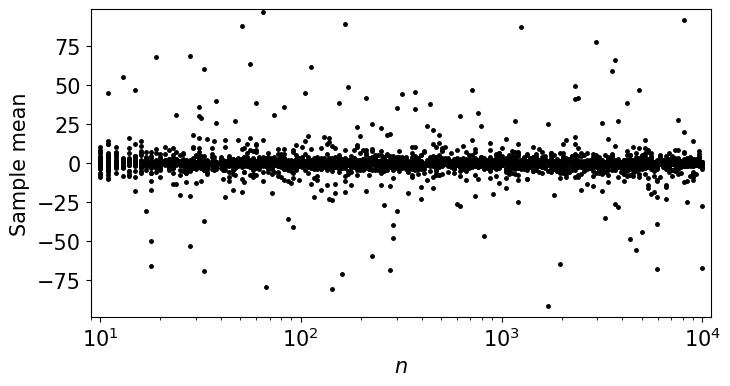

In [3]:
tries = 20
m = 200
n_vals = np.logspace(1,4,m,dtype=int)
n_max = 10**4

ymin = -99
ymax = 99

plt.figure(figsize=(8,4))
plt.xticks(fontsize=font_size) 
plt.yticks(fontsize=font_size)
plt.xlim([9,n_max*1.1])
plt.ylim(ymin,ymax)
for ind_n,n in enumerate(n_vals):
    realizations = (rng.standard_cauchy((n,tries))).astype('float')
    sample_means = np.sum(realizations,axis=0) / n
    plt.semilogx(n * np.ones(tries),sample_means,'.',color="black",ms=5)
plt.xlabel(r"$n$",fontsize=font_size)
plt.ylabel('Sample mean',fontsize=font_size,labelpad=5);

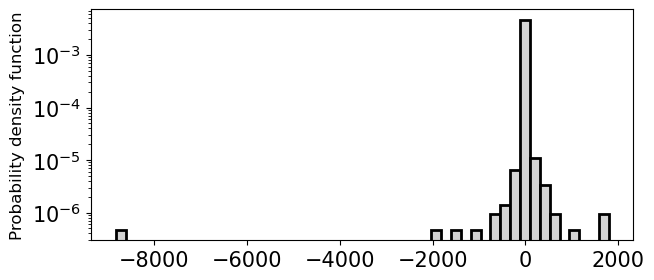

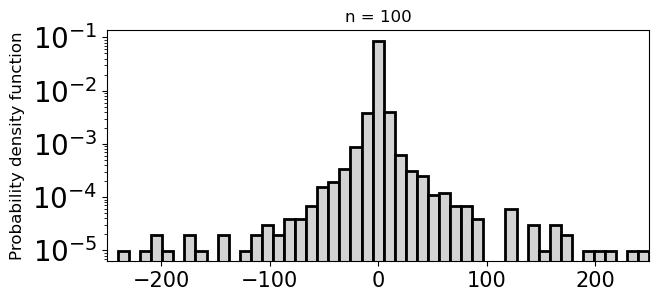

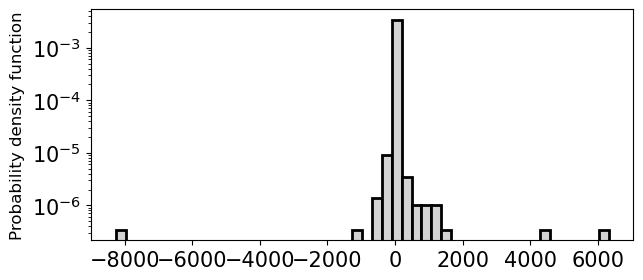

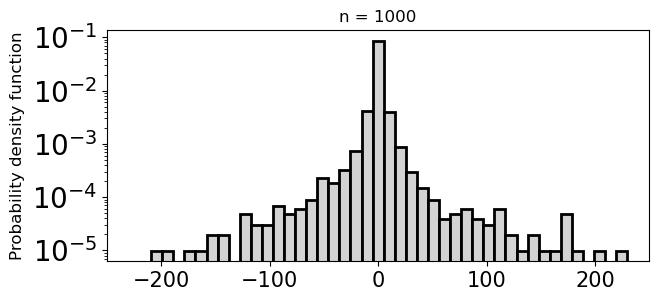

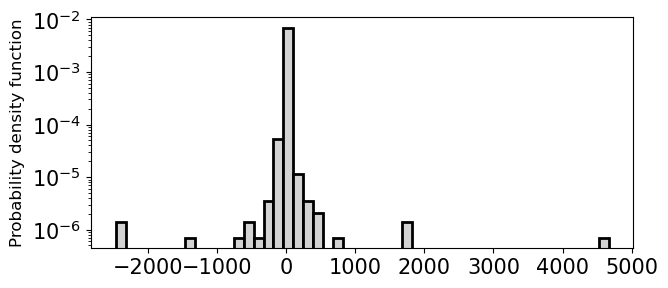

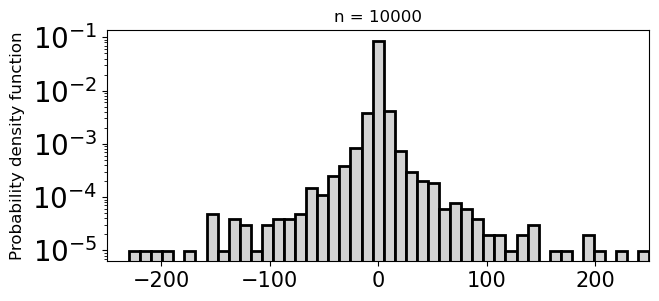

In [4]:
rng = default_rng(12345)
tries = int(1e4) # 1e5 takes a while
n_vals = [100,1000,10000]
x_min_log = -250
x_max_log = 250
y_max_log = 9e-3
y_min_log = 1e-7
n_bins = 50
bin_edges = np.linspace(x_min_log,x_max_log,n_bins)
x = np.arange(-4,4+1e-2,1e-2)
x_min = -100
x_max = 100

for ind_n,n in enumerate(n_vals):
    realizations = (rng.standard_cauchy((n,tries))).astype('float')
    sample_means = np.sum(realizations,axis=0) / n 

    plt.figure(figsize=(7,3))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(sample_means,bins=n_bins,log=True,color='lightgray', edgecolor='black',
              linewidth=2,density=True)
    plt.ylabel(r"Probability density function",fontsize=font_size-3,labelpad=5)
    
    plt.figure(figsize=(7,3))
    plt.xticks([-200,-100,0,100,200],fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks+5)
    plt.xlim([x_min_log,x_max_log])
    plt.hist(sample_means,bins=bin_edges,log=True,color='lightgray', edgecolor='black',
              linewidth=2,density=True)
    plt.ylabel(r"Probability density function",fontsize=font_size-3,labelpad=5)
    plt.title(r"n = "+str(n))